그래프 코드

In [1]:
import pandas as pd
df = pd.read_csv('./서울시자동차등록현황.csv')

df= df.drop(0)
df = df.set_index("자치구별")
print(df)

df_t = df.transpose()

        2000    2005    2010    2015    2020    2021    2022
자치구별                                                        
종로구    55174   57001   53043   53031   53472   53339   53098
중구     56619   53398   62836   56470   54841   63506   60758
용산구    64335   74257   81514   83496   87636   88363   82765
성동구    78922   89751   90979   98329  104962  102131  101907
광진구    89113   91202   94698   99183  100774  100915  101583
동대문구   82441   90799   95106  102996  106231  107187  108327
중랑구    91090   96525  103258  111936  116603  117311  119241
성북구    93099  108492  123315  127190  131711  130222  132072
강북구    65993   76483   80318   84325   85754   81003   81400
도봉구    76403   87645   89883   93388   94279   92946   92600
노원구   128509  139545  146241  147747  147426  147653  148210
은평구    93431  104675  115729  128342  135193  134628  165549
서대문구   79413   80887   80496   84648   91857   89819   92192
마포구    88768  101400  108045  116054  119639  121467  118022
양천구   108350  128813  13

In [3]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
     ---------------------------------------- 62.6/62.6 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/157.0 kB ? eta -:--:--
     -------------------------------------- 157.0/157.0 kB 4.7 MB/s eta 0:00:00
  Using cached charset_normalizer-3.1.0-cp39-cp39-win_amd64.whl (97 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     ---------------------------------------- 0.0/123.6 kB ? eta -:--:--
     -------------------------------------- 123.6/123.6 kB 7.6 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.0 MB 804.6 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.0 MB 804.6 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.0 MB 573.4 kB/s eta 0:00:02
     -------- ------------------------------- 0.2/1.0 MB 726.5 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.0 MB 749.3 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.0 MB 749.3 kB/s eta 0:00:02
     ----------- ---------------------------- 0.3/1.0 MB 632.7 kB/s eta 0:00:02
     ------------ --------------------------- 0.3/1.0 MB 593.9 kB/s eta 0:00:02
     -------------- ------

In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [8]:
#데이터 전처리
data = {'District': ['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
        '2000': [55174, 56619, 64335, 78922, 89113, 82441, 91090, 93099, 65993, 76403, 128509, 93431, 79413, 88768, 108350, 110662, 84234, 55091, 101472, 82843, 99223, 128749, 186168, 161085, 113262],
        '2005': [57001, 53398, 74257, 89751, 91202, 90799, 96525, 108492, 76483, 87645, 139545, 104675, 80887, 101400, 128813, 139479, 103482, 63110, 121287, 94488, 116240, 144840, 212393, 167522, 116759],
        '2010': [53043, 62836, 81514, 90979, 94698, 95106, 103258, 123315, 80318, 89883, 146241, 115729, 80496, 108045, 138019, 158121, 114445, 66583, 127671, 98034, 122310, 154204, 215398, 196836, 130439],
        '2015': [53031, 56470, 83496, 98329, 99183, 102996, 111936, 127190, 84325, 93388, 147747, 128342, 84648, 116054, 143945, 175903, 128294, 75325, 134955, 106116, 128081, 169230, 221867, 205698, 131858],
        '2020': [53472, 54841, 87636, 104962, 100774, 106231, 116603, 131711, 85754, 94279, 147426, 135193, 91857, 119639, 151129, 187762, 133120, 83335, 137754, 110369, 128471, 168678, 221196, 226800, 144860],
        '2021': [53339, 63506, 88363, 102131, 100915, 107187, 117311, 130222, 81003, 92946, 147653, 134628, 89819, 121467, 146724, 188972, 132388, 83959, 139838, 111350, 123707, 166138, 220975, 227035, 147977],
        '2022': [53098, 60758, 82765, 101907, 101583, 108327, 119241, 132072, 81400, 92600, 148210, 165549, 92192, 118022, 144059, 190859, 133973, 86298, 136451, 109862, 124549, 165969, 227803, 230070, 148961]
}

df = pd.DataFrame(data)
df

District    2000    2005    2010    2015    2020    2021    2022
0         Jongno-gu   55174   57001   53043   53031   53472   53339   53098
1           Jung-gu   56619   53398   62836   56470   54841   63506   60758
2        Yongsan-gu   64335   74257   81514   83496   87636   88363   82765
3      Seongdong-gu   78922   89751   90979   98329  104962  102131  101907
4       Gwangjin-gu   89113   91202   94698   99183  100774  100915  101583
5     Dongdaemun-gu   82441   90799   95106  102996  106231  107187  108327
6       Jungnang-gu   91090   96525  103258  111936  116603  117311  119241
7       Seongbuk-gu   93099  108492  123315  127190  131711  130222  132072
8        Gangbuk-gu   65993   76483   80318   84325   85754   81003   81400
9         Dobong-gu   76403   87645   89883   93388   94279   92946   92600
10         Nowon-gu  128509  139545  146241  147747  147426  147653  148210
11     Eunpyeong-gu   93431  104675  115729  128342  135193  134628  165549
12     Seodaemun-gu   79413   80887   80496   84648   91857   89819   92192
13          Mapo-gu   88768  101400  108045  116054  119639  121467  118022
14     Yangcheon-gu  108350  128813  138019  143945  151129  146724  144059
15       Gangseo-gu  110662  139479  158121  175903  187762  188972  190859
16          Guro-gu   84234  103482  114445  128294  133120  132388  133973
17     Geumcheon-gu   55091   63110   66583   75325   83335   83959   86298
18  Yeongdeungpo-gu  101472  121287  127671  134955  137754  139838  136451
19       Dongjak-gu   82843   94488   98034  106116  110369  111350  109862
20        Gwanak-gu   99223  116240  122310  128081  128471  123707  124549
21        Seocho-gu  128749  144840  154204  169230  168678  166138  165969
22       Gangnam-gu  186168  212393  215398  221867  221196  220975  227803
23        Songpa-gu  161085  167522  196836  205698  226800  227035  230070
24      Gangdong-gu  113262  116759  130439  131858  144860  147977  148961

In [16]:
%pip install resgister
%pip install resgister_last

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement resgister (from versions: none)
ERROR: No matching distribution found for resgister

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement resgister_last (from versions: none)
ERROR: No matching distribution found for resgister_last

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(0.0, 1600000.0)

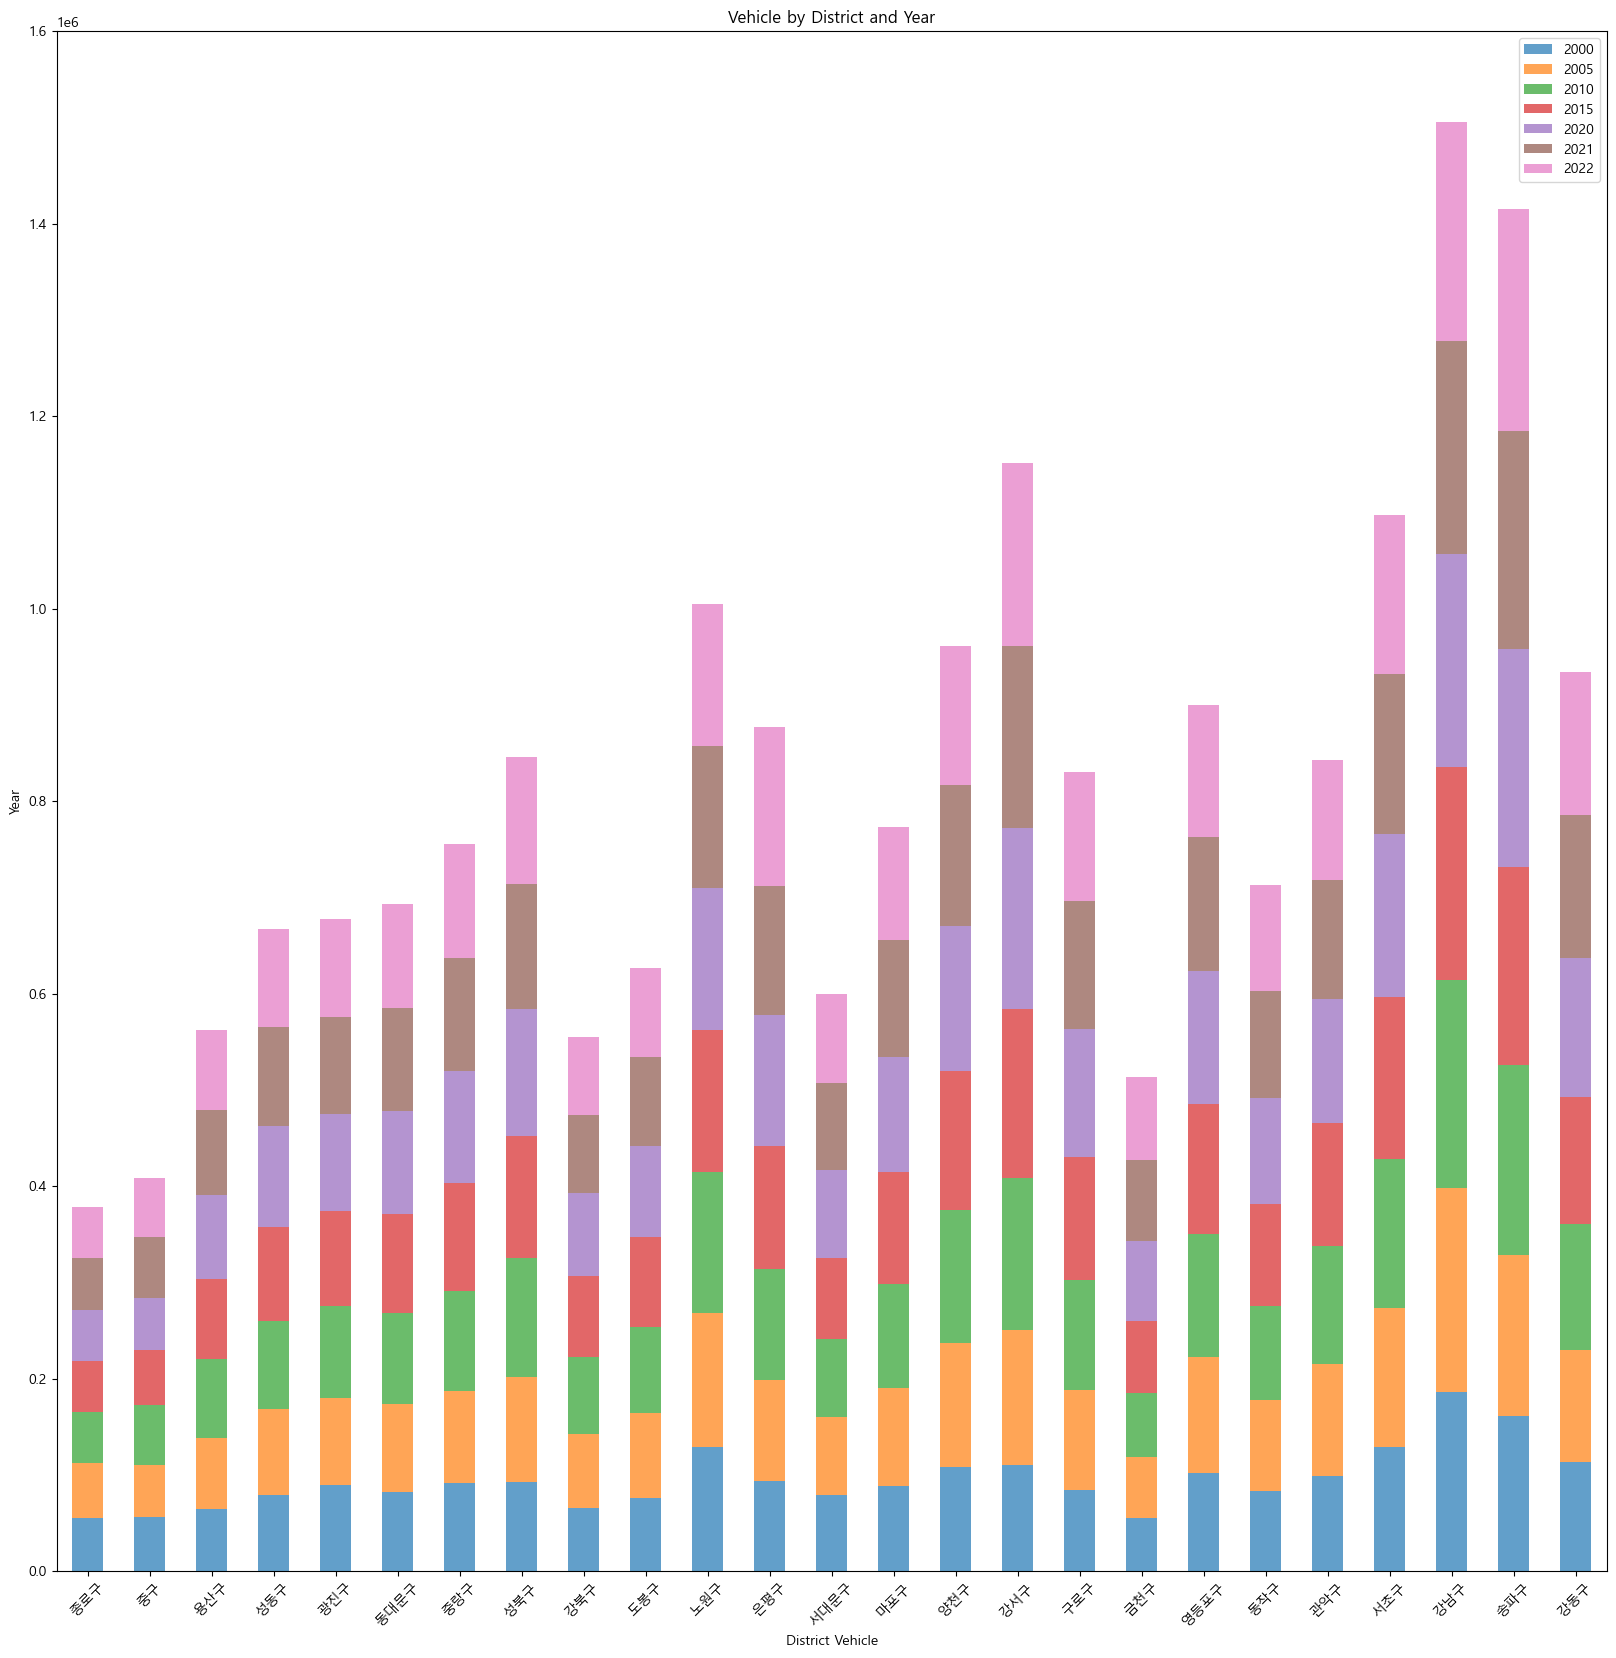

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./서울시자동차.csv')

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)


x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
ticklabel=['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']


down=[]

plt.rcParams['figure.figsize']=[20,20]
df.plot(kind='bar',stacked=True,alpha=0.7)
plt.title("Vehicle by District and Year")
plt.xlabel("District Vehicle")
plt.ylabel("Year")
plt.xticks(x,ticklabel)
plt.xticks(rotation=45)
plt.ylim(0, 1600000)

In [23]:
%pip install folium
%pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


결과 1 민영/공영 주차장 위치와 불법주정차 위치의 관계를 보여줌

In [35]:
import pandas as pd
import folium
from geopy.distance import geodesic
from folium.plugins import MarkerCluster

df = pd.read_csv('./서울공영주차장.csv')
df2 = df[df['주소'].str.contains('강남구')]
df2 = df2[['주차장명', '유무료구분명', '추가 단위 시간(분 단위)', '기본 주차 요금', '추가 단위 요금', '일 최대 요금', '위도', '경도']].dropna()

m = folium.Map(location=[37.58, 127.0], tiles='openstreetmap', zoom_start=11)

# 최소 거리와 해당 주차장 정보를 저장할 변수 초기화
min_distance = float('inf')
nearest_parking = None

for i, row in df2.iterrows():
    name = df2['주차장명'][i]
    free = df2['유무료구분명'][i]
    plustime = str(df2['추가 단위 시간(분 단위)'][i])
    fundamental = str(df2['기본 주차 요금'][i])
    plus = str(df2['추가 단위 요금'][i])
    latitude = row['위도']
    longitude = row['경도']

 
    iframe = name + "<br>" + "(" + free + ")" + "<br>" + "기본가격:" + fundamental + "원"
    
    popup = folium.Popup(iframe, min_width=150, max_width=200)
    folium.Marker(
        location=[latitude, longitude],
        popup=popup,
        icon=folium.Icon(color='blue')
    ).add_to(m)



df3 = pd.read_csv('./강남구 불법주정차 좌표.csv')


# 불법주정차 마커 추가(빨간색)
illegal_cluster = MarkerCluster()

for i, row in df3.iterrows():
    iframe = "CCTV 불법주정차 단속 위치:"+df3['CCTV명'][i] + "<br>" + "주소:"+df3['주소'][i]
    popup = folium.Popup(iframe, min_width=150, max_width=400)
    marker = folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        icon=folium.Icon(color='red', icon='star')
    )
    illegal_cluster.add_child(marker)

m.add_child(illegal_cluster)


m


결과 2 주차장 추천 경로

In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic

# 사용자의 위치 정보 입력
user_latitude = float(input("사용자의 위도 입력: "))
user_longitude = float(input("사용자의 경도 입력: "))

num = int(input("주차장 사용시간 입력(분단위로):"))
df = pd.read_csv('./서울공영주차장.csv')
df2 = df[df['주소'].str.contains('강남구')]
df2 = df2[['주차장명', '유무료구분명', '추가 단위 시간(분 단위)', '기본 주차 요금', '추가 단위 요금', '일 최대 요금', '위도', '경도']].dropna()

m = folium.Map(location=[user_latitude, user_longitude], tiles='openstreetmap', zoom_start=13)

# 최소 거리와 해당 주차장 정보를 저장할 변수 초기화
min_distance = float('inf')
nearest_parking = None

marker_cluster = MarkerCluster().add_to(m)

for i, row in df2.iterrows():
    name = df2['주차장명'][i]
    free = df2['유무료구분명'][i]
    plustime = str(df2['추가 단위 시간(분 단위)'][i])
    fundamental = str(df2['기본 주차 요금'][i])
    plus = str(df2['추가 단위 요금'][i])
    latitude = row['위도']
    longitude = row['경도']

    # 사용자 위치와 주차장 위치 사이의 거리 계산
    distance = geodesic((user_latitude, user_longitude), (latitude, longitude)).km

    if num % df2['추가 단위 시간(분 단위)'][i] == 0:
        user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * (num / df2['추가 단위 시간(분 단위)'][i]))
        iframe = name + "<br>" + "(" + free + ")" + "<br>" + "기본가격:" + fundamental + "원" + "<br>" + "추가가격:" + plus + "<br>" + "추가 단위 시간(분 단위):" + plustime + "<br>" + "사용자가 내야할 금액:" + user + "원"
    else:
        user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / df2['추가 단위 시간(분 단위)'][i]) + 1))
        iframe = name + "<br>" + "(" + free + ")" + "<br>" + "기본가격:" + fundamental + "원" + "<br>" + "추가가격:" + plus + "<br>" + "추가 단위 시간(분 단위):" + plustime + "<br>" + "사용자가 내야할 금액:" + user + "원"
        
    popup = folium.Popup(iframe, min_width=150, max_width=200)
    folium.Marker(
        location=[latitude, longitude],
        popup=popup,
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

    # 최소 거리와 해당 주차장 정보 업데이트
    if distance < min_distance:
        min_distance = distance
        nearest_parking = name

# 사용자 위치에 마커 추가
popup = folium.Popup('<h4 style="text-align: center; white-space: nowrap;">사용자 위치</h4>', min_width=150, max_width=200)
folium.Marker(
    location=[user_latitude, user_longitude],
    popup=popup,
    icon=folium.Icon(color='red', icon='user')
).add_to(m)

# 가장 가까운 주차장에 마커 추가

nearest_parking_location = df2.loc[df2['주차장명'] == nearest_parking, ['위도', '경도']].values.tolist()[0]
parking_popup = folium.Popup('<h4 style="text-align: center; white-space: nowrap;">가장 가까운 주차장: ' + nearest_parking + '</h4>', min_width=150, max_width=400)
folium.Marker(
    location=nearest_parking_location,
    popup=parking_popup,
    icon=folium.Icon(color='green', icon='car')
).add_to(m)
df3 = pd.read_csv('./강남구 불법주정차 좌표.csv')


print("가장 가까운 주차장:", nearest_parking)
m


/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_80287/2738022850.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / df2['추가 단위 시간(분 단위)'][i]) + 1))
/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_80287/2738022850.py:39: RuntimeWarning: invalid value encountered in scalar multiply
  user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / df2['추가 단위 시간(분 단위)'][i]) + 1))


가장 가까운 주차장: 테헤란로26길(구)


리그레션을 쓴 데이터(그러나 결과값이 좋지 않아 결국 사용하지 않음)

In [21]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 사용자의 위치 정보 입력
user_latitude = float(input("사용자의 위도 입력: "))
user_longitude = float(input("사용자의 경도 입력: "))

num = int(input("주차장 사용시간 입력(분단위로): "))
df = pd.read_csv('./서울공영주차장.csv')
df2 = df[df['주소'].str.contains('강남구')]
df2 = df2[['주차장명', '유무료구분명', '추가 단위 시간(분 단위)', '기본 주차 요금', '추가 단위 요금', '일 최대 요금', '위도', '경도']].dropna()

# 배열 선언
X = []
y = []

for i, row in df2.iterrows():
    latitude = row['위도']
    longitude = row['경도']
    distance = geodesic((user_latitude, user_longitude), (latitude, longitude)).km

    X.append([latitude, longitude])  
    y.append(distance) 
    
# 리니어 리스레션 모델
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

m = folium.Map(location=[user_latitude, user_longitude], tiles='openstreetmap', zoom_start=13)

# 최소 거리와 해당 주차장 정보를 저장할 변수 초기화
min_distance = float('inf')
nearest_parking = None

marker_cluster = MarkerCluster().add_to(m)

# 예상 거리를 계산하고 결제 계산을 업데이트
for i, row in df2.iterrows():
    name = df2['주차장명'][i]
    free = df2['유무료구분명'][i]
    plustime = str(df2['추가 단위 시간(분 단위)'][i])
    fundamental = str(df2['기본 주차 요금'][i])
    plus = str(df2['추가 단위 요금'][i])
    latitude = row['위도']
    longitude = row['경도']
    additional_time = df2['추가 단위 시간(분 단위)'][i]

    # 리그레션 모델을 사용하여 가장 가까운 주차장을 예측
    predicted_distance = regression_model.predict([[latitude, longitude]])

    if num % additional_time == 0:
        user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * (num / additional_time))
        iframe = name + "<br>" + "(" + free + ")" + "<br>" + "기본가격:" + fundamental + "원" + "<br>" + "추가가격:" + plus + "<br>" + "추가 단위 시간(분 단위):" + plustime + "<br>" + "사용자가 내야할 금액:" + user + "원"
    else:
        user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / additional_time) + 1))
        iframe = name + "<br>" + "(" + free + ")" + "<br>" + "기본가격:" + fundamental + "원" + "<br>" + "추가가격:" + plus + "<br>" + "추가 단위 시간(분 단위):" + plustime + "<br>" + "사용자가 내야할 금액:" + user + "원"
        
    popup = folium.Popup(iframe, min_width=150, max_width=200)
    folium.Marker(
        location=[latitude, longitude],
        popup=popup,
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

    # 최소 거리와 해당 주차장 정보 업데이트
    if predicted_distance < min_distance:
        min_distance = predicted_distance
        nearest_parking = name

# 사용자 위치에 마커 추가
folium.Marker(
    location=[user_latitude, user_longitude],
    popup="사용자 위치",
    icon=folium.Icon(color='red', icon='user')
).add_to(m)

# 가장 가까운 주차장에 마커 추가
nearest_parking_location = df2.loc[df2['주차장명'] == nearest_parking, ['위도', '경도']].values.tolist()[0]
folium.Marker(
    location=nearest_parking_location,
    popup="가장 가까운 주차장: " + nearest_parking,
    icon=folium.Icon(color='green', icon='car')
).add_to(m)

df3 = pd.read_csv('./강남구 불법주정차 좌표.csv')

# 가장 가까운 주차장에 마커 추가
illegal_cluster = MarkerCluster()

for i, row in df3.iterrows():
    iframe = "CCTV 불법주정차 단속 위치:" + df3['CCTV명'][i] + "<br>" + "Address: " + df3['주소'][i]
    popup = folium.Popup(iframe, min_width=150, max_width=200)
    marker = folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        icon=folium.Icon(color='red', icon='star')
    )
    illegal_cluster.add_child(marker)

m.add_child(illegal_cluster)

m


/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_67217/220991888.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / additional_time) + 1))
/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_67217/220991888.py:60: RuntimeWarning: invalid value encountered in scalar multiply
  user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / additional_time) + 1))
/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_67217/220991888.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / additional_time) + 1))
/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_67217/220991888.py:60: RuntimeWarning: invalid value encountered in scalar multiply
  user = str(df2['기본 주차 요금'][i] + df2['추가 단위 요금'][i] * ((num / additional_time) + 1))
/var/folders/43/wqbvrhm53m92w_33lv_sw9gr0000gn/T/ipykernel_67217/220991888.py:60: Runt